<a href="https://colab.research.google.com/github/fmuranda/pythia-foundations/blob/main/core/xarray/computation-masking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computations and Masks with Xarray

---

## Overview

In this tutorial, we will cover the following topics:

1. Performing basic arithmetic on `DataArrays` and `Datasets`
2. Performing aggregation (i.e., reduction) along single or multiple dimensions of a `DataArray` or `Dataset`
3. Computing climatologies and anomalies of data using Xarray's "split-apply-combine" approach, via the `.groupby()` method
4. Performing weighted-reduction operations along single or multiple dimensions of a `DataArray` or `Dataset`
5. Providing a broad overview of Xarray's data-masking capability
6. Using the `.where()` method to mask Xarray data

## Prerequisites


| Concepts | Importance | Notes |
| --- | --- | --- |
| [Introduction to Xarray](xarray-intro) | Necessary | {cite:t}`hoyer2017xarray` |


- **Time to learn**: 60 minutes

---

## Imports

In order to work with data and plotting, we must import NumPy, Matplotlib, and Xarray. These packages are covered in greater detail in earlier tutorials. We also import a package that allows quick download of Pythia example datasets.

In [2]:
!pip install pythia_datasets
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from pythia_datasets import DATASETS

## Data Setup

The bulk of the examples in this tutorial make use of a single dataset. This dataset contains monthly sea surface temperature (SST, call 'tos' here) data, and is obtained from the Community Earth System Model v2 (CESM2). (For this tutorial, however, the dataset will be retrieved from the Pythia example data repository.) The following example illustrates the process of retrieving this Global Climate Model dataset:

In [4]:
!pip install cftime
filepath = DATASETS.fetch('CESM2_sst_data.nc')
ds = xr.open_dataset(filepath)
ds

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.1 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/xarray/conventions.py:204: SerializationWarning: variable 'tos' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


<xarray.Dataset> Size: 47MB
Dimensions:    (time: 180, d2: 2, lat: 180, lon: 360)
Coordinates:
  * time       (time) object 1kB 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Dimensions without coordinates: d2
Data variables:
    time_bnds  (time, d2) object 3kB ...
    lat_bnds   (lat, d2) float64 3kB ...
    lon_bnds   (lon, d2) float64 6kB ...
    tos        (time, lat, lon) float32 47MB ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  219000.0
    case_id:                972
    ...                     ...
    sub_experiment_id:      none
    table_id:               Omon
    tracking_id:            hdl:21.14100/2975ffd3-1d7b-47e3-961a-33f212ea4eb2
    variable_id:            tos
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r11i1p1f1

## Arithmetic Operations

In a similar fashion to NumPy arrays, performing an arithmetic operation on a `DataArray` will automatically perform the operation on all array values; this is known as vectorization. To illustrate the process of vectorization, the following example converts the air temperature data from units of degrees Celsius to units of Kelvin:

In [5]:
ds.tos + 273.15

<xarray.DataArray 'tos' (time: 180, lat: 180, lon: 360)> Size: 47MB
array([[[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [271.3552 , 271.3553 , 271.3554 , ..., 271.35495, 271.355  ,
         271.3551 ],
        [271.36005, 271.36014, 271.36023, ..., 271.35986, 271.35992,
         271.36   ],
        [271.36447, 271.36453, 271.3646 , ..., 271.3643 , 271.36435,
         271.3644 ]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
...
        [271.40677, 271.40674, 271.4067 , ..., 271.40695, 271.4069 ,
         271.40683],
        [271.41296, 271.41293, 271.41293, ..., 271.41306, 271.413  ,
         271.41296],
        [271.41772, 271.41772, 271.41772, ..., 271.41766, 271.4177 ,
         271.4177 ]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [271.39386, 271.39383, 271.3938 , ..., 271.39407, 271.394  ,
         271.39392],
        [271.39935, 271.39932, 271.39932, ..., 271.39948, 271.39944,
         271.39938],
        [271.40372, 271.40372, 271.40375, ..., 271.4037 , 271.4037 ,
         271.40372]]], dtype=float32)
Coordinates:
  * time     (time) object 1kB 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Attributes: (12/19)
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    This may differ from "surface temperature" in regions of ...
    frequency:      mon
    id:             tos
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Surface Temperature
    type:           real
    units:          degC
    variable_id:    tos

In addition, there are many other arithmetic operations that can be performed on `DataArrays`. In this example, we demonstrate squaring the original Celsius values of our air temperature data:

In [6]:
ds.tos**2

<xarray.DataArray 'tos' (time: 180, lat: 180, lon: 360)> Size: 47MB
array([[[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [3.2213385, 3.2209656, 3.220537 , ..., 3.2221622, 3.221913 ,
         3.2216525],
        [3.203904 , 3.203617 , 3.2032912, ..., 3.2045207, 3.2043478,
         3.2041442],
        [3.1881146, 3.1879027, 3.1876712, ..., 3.188714 , 3.1885312,
         3.1883302]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
...
        [3.0388296, 3.0389647, 3.0390673, ..., 3.038165 , 3.0383828,
         3.0386322],
        [3.0173173, 3.0173445, 3.0173297, ..., 3.0169601, 3.0171173,
         3.0172386],
        [3.000791 , 3.0007784, 3.0007539, ..., 3.000933 , 3.000896 ,
         3.0008452]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [3.0839543, 3.0841148, 3.0842566, ..., 3.0832636, 3.0834875,
         3.0837412],
        [3.064733 , 3.0648024, 3.0648358, ..., 3.0642793, 3.0644639,
         3.0646174],
        [3.0494578, 3.0494475, 3.0494263, ..., 3.049596 , 3.0495603,
         3.0495107]]], dtype=float32)
Coordinates:
  * time     (time) object 1kB 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Attributes: (12/19)
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    This may differ from "surface temperature" in regions of ...
    frequency:      mon
    id:             tos
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Surface Temperature
    type:           real
    units:          degC
    variable_id:    tos

## Aggregation Methods

A common practice in the field of data analysis is aggregation. Aggregation is the process of reducing data through methods such as `sum()`, `mean()`, `median()`, `min()`, and `max()`, in order to gain greater insight into the nature of large datasets. In this set of examples, we demonstrate correct usage of a select group of aggregation methods:

Compute the mean:

In [7]:
ds.tos.mean()

<xarray.DataArray 'tos' ()> Size: 8B
array(14.48397064)
Attributes: (12/19)
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    This may differ from "surface temperature" in regions of ...
    frequency:      mon
    id:             tos
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Surface Temperature
    type:           real
    units:          degC
    variable_id:    tos

Notice that we did not specify the `dim` keyword argument; this means that the function was applied over all of the dataset's dimensions. In other words, the aggregation method computed the mean of every element of the temperature dataset across every temporal and spatial data point. However, if a dimension name is used with the `dim` keyword argument, the aggregation method computes an aggregation along the given dimension. In this next example, we use aggregation to calculate the temporal mean across all spatial data; this is performed by providing the dimension name `'time'` to the `dim` keyword argument:

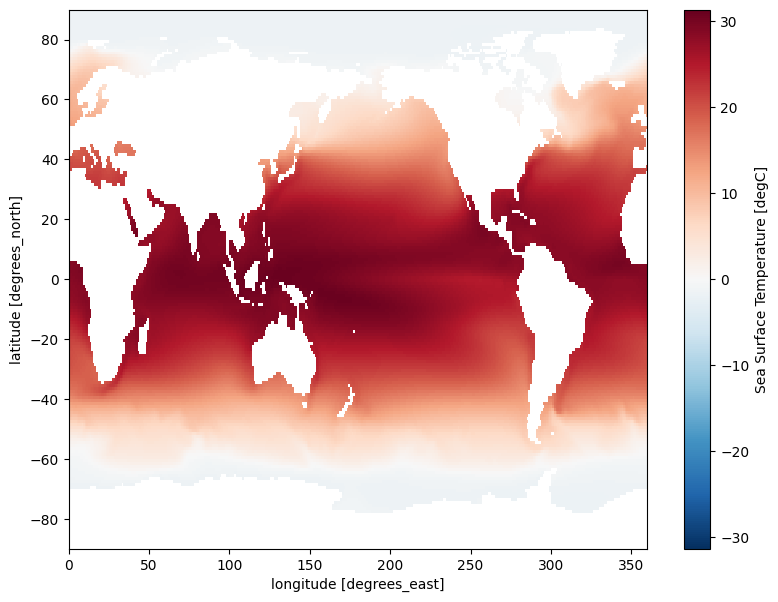

In [8]:
ds.tos.mean(dim='time').plot(size=7);

There are many other combinations of aggregation methods and dimensions on which to perform these methods. In this example, we compute the temporal minimum:

In [9]:
ds.tos.min(dim=['time'])

<xarray.DataArray 'tos' (lat: 180, lon: 360)> Size: 259kB
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [-1.8083605, -1.8083031, -1.8082187, ..., -1.8083988, -1.8083944,
        -1.8083915],
       [-1.8025414, -1.8024837, -1.8024155, ..., -1.8026428, -1.8026177,
        -1.8025846],
       [-1.7984415, -1.7983989, -1.7983514, ..., -1.7985678, -1.7985296,
        -1.7984871]], dtype=float32)
Coordinates:
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Attributes: (12/19)
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    This may differ from "surface temperature" in regions of ...
    frequency:      mon
    id:             tos
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Surface Temperature
    type:           real
    units:          degC
    variable_id:    tos

This example computes the spatial sum. Note that this dataset contains no altitude data; as such, the required spatial dimensions passed to the method consist only of latitude and longitude.

In [10]:
ds.tos.sum(dim=['lat', 'lon'])

<xarray.DataArray 'tos' (time: 180)> Size: 720B
array([603767.  , 607702.5 , 603976.5 , 599373.56, 595119.94, 595716.75,
       598177.3 , 600670.6 , 597825.56, 591869.  , 590507.7 , 597189.2 ,
       605954.06, 609151.  , 606868.9 , 602329.9 , 599465.75, 601205.5 ,
       605144.4 , 608588.5 , 604046.9 , 598927.75, 597519.75, 603876.9 ,
       612424.44, 615765.2 , 612615.44, 606310.6 , 602034.4 , 600784.9 ,
       602013.5 , 603142.2 , 598850.9 , 591917.44, 589234.56, 596162.5 ,
       602942.06, 607196.9 , 604928.2 , 601735.6 , 599011.8 , 599490.9 ,
       600801.44, 602786.94, 598867.2 , 594081.8 , 593736.25, 598995.6 ,
       607285.25, 611901.06, 609562.75, 603527.3 , 600215.4 , 601372.6 ,
       604144.5 , 605376.75, 601256.2 , 595245.2 , 594002.06, 600490.4 ,
       611878.6 , 616563.  , 613050.8 , 605734.  , 600808.75, 600898.06,
       603930.56, 605644.7 , 599917.5 , 592048.06, 590082.8 , 596950.7 ,
       607701.94, 610844.7 , 609509.6 , 603380.94, 599838.1 , 600334.25,
       604386.6 , 607848.1 , 602155.2 , 594949.06, 593815.06, 598365.3 ,
       608730.8 , 612056.5 , 609922.5 , 603077.1 , 600134.1 , 602821.2 ,
       606152.75, 610257.8 , 604685.8 , 596858.  , 592894.8 , 599944.9 ,
       609764.44, 614610.75, 611434.75, 605606.4 , 603790.94, 605750.2 ,
       609250.06, 612935.7 , 609645.06, 601706.4 , 598896.5 , 605349.75,
       614671.8 , 618686.7 , 615895.2 , 609438.2 , 605399.56, 606126.75,
       607942.3 , 609680.4 , 604814.25, 595841.94, 591908.44, 595638.7 ,
       604798.94, 611327.1 , 609765.7 , 603727.56, 600970.  , 602514.  ,
       606303.7 , 609225.25, 603724.3 , 595944.8 , 594477.4 , 597807.4 ,
       607379.06, 611808.56, 610112.94, 607196.3 , 604733.06, 605488.25,
       610048.3 , 612655.75, 608906.25, 602349.7 , 601754.2 , 609220.4 ,
       619367.1 , 623783.2 , 619949.7 , 613369.06, 610190.8 , 611091.2 ,
       614213.44, 615665.06, 611722.2 , 606259.56, 605970.2 , 611463.3 ,
       619794.6 , 626036.5 , 623085.44, 616295.9 , 611886.3 , 611881.9 ,
       614420.75, 616853.56, 610375.44, 603471.5 , 602108.25, 608094.3 ,
       617450.7 , 623508.7 , 619830.2 , 612033.3 , 608737.2 , 610105.25,
       613692.7 , 616360.44, 611735.4 , 606512.7 , 604249.44, 608777.44],
      dtype=float32)
Coordinates:
  * time     (time) object 1kB 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
Attributes: (12/19)
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    This may differ from "surface temperature" in regions of ...
    frequency:      mon
    id:             tos
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Surface Temperature
    type:           real
    units:          degC
    variable_id:    tos

For the last example in this set of aggregation examples, we compute the temporal median:

In [11]:
ds.tos.median(dim='time')

<xarray.DataArray 'tos' (lat: 180, lon: 360)> Size: 259kB
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [-1.7648907, -1.7648032, -1.7647004, ..., -1.7650614, -1.7650102,
        -1.7649589],
       [-1.7590305, -1.7589546, -1.7588665, ..., -1.7591925, -1.7591486,
        -1.759095 ],
       [-1.7536805, -1.753602 , -1.7535168, ..., -1.753901 , -1.753833 ,
        -1.7537591]], dtype=float32)
Coordinates:
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Attributes: (12/19)
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    This may differ from "surface temperature" in regions of ...
    frequency:      mon
    id:             tos
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Surface Temperature
    type:           real
    units:          degC
    variable_id:    tos

In addition, there are many other commonly used aggregation methods in Xarray. Some of the more popular aggregation methods are summarized in the following table:

| Aggregation              | Description                     |
|--------------------------|---------------------------------|
| ``count()``              | Total number of items           |
| ``mean()``, ``median()`` | Mean and median                 |
| ``min()``, ``max()``     | Minimum and maximum             |
| ``std()``, ``var()``     | Standard deviation and variance |
| ``prod()``               | Compute product of elements            |
| ``sum()``                | Compute sum of elements                |
| ``argmin()``, ``argmax()``| Find index of minimum and maximum value |

## GroupBy: Split, Apply, Combine

While we can obtain useful summaries of datasets using simple aggregation methods, it is more often the case that aggregation must be performed over coordinate labels or groups. In order to perform this type of aggregation, it is helpful to use the **split-apply-combine** workflow. Fortunately, Xarray provides this functionality for `DataArrays` and `Datasets` by means of the `groupby` operation. The following figure illustrates the split-apply-combine workflow in detail:

<img src="https://github.com/fmuranda/pythia-foundations/blob/main/core/xarray/images/xarray-split-apply-combine.jpeg?raw=1">

Based on the above figure, you can understand the split-apply-combine process performed by `groupby`. In detail, the steps of this process are:

- The split step involves breaking up and grouping an xarray `Dataset` or `DataArray` depending on the value of the specified group key.
- The apply step involves computing some function, usually an aggregate, transformation, or filtering, within the individual groups.
- The combine step merges the results of these operations into an output xarray `Dataset` or `DataArray`.

In this set of examples, we will remove the seasonal cycle (also known as a climatology) from our dataset using `groupby`. There are many types of input that can be provided to `groupby`; a full list can be found in [Xarray's `groupby` user guide](https://xarray.pydata.org/en/stable/user-guide/groupby.html).

In this first example, we plot data to illustrate the annual cycle described above. We first select the grid point closest to a specific latitude-longitude point. Once we have this grid point, we can plot a temporal series of sea-surface temperature (SST) data at that location. Reviewing the generated plot, the annual cycle of the data becomes clear.

/tmp/ipython-input-2837050679.py:6: FutureWarning: In a future version of xarray to_datetimeindex will default to returning a 'us'-resolution DatetimeIndex instead of a 'ns'-resolution DatetimeIndex. This warning can be silenced by explicitly passing the `time_unit` keyword argument.
  ds_plot['time'] = time_values.to_datetimeindex()


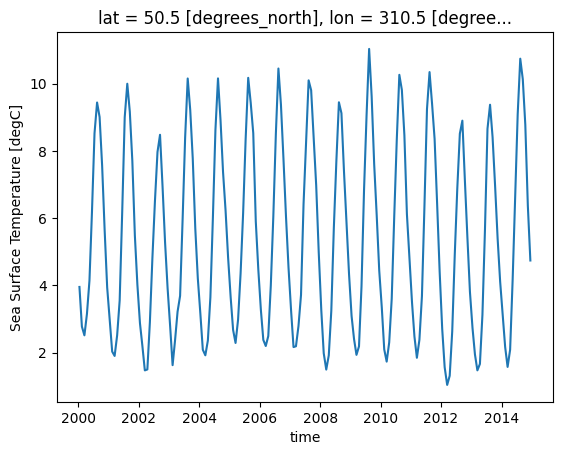

In [14]:
# Use a more robust way to convert cftime to standard datetime
import pandas as pd
ds_plot = ds.copy()
time_values = ds_plot.indexes['time']
try:
    ds_plot['time'] = time_values.to_datetimeindex()
except:
    # Fallback for older versions or specific cftime configurations
    ds_plot['time'] = [pd.Timestamp(str(t)) for t in ds_plot.time.values]

ds_plot.tos.sel(lon=310, lat=50, method='nearest').plot();

### Split

The first step of the split-apply-combine process is splitting. As described above, this step involves splitting a dataset into groups, with each group matching a group key. In this example, we split the SST data using months as a group key. Therefore, there is one resulting group for January data, one for February data, etc. This code illustrates how to perform such a split:

In [25]:
# Manually extract month for grouping to bypass accessor issues
months = xr.DataArray([t.month for t in ds.time.values], coords=[ds.time], dims=['time'], name='month')
ds.tos.groupby(months)

<DataArrayGroupBy, grouped over 1 grouper(s), 12 groups in total:
    'month': UniqueGrouper('month'), 12/12 groups with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12>

```{admonition} Info
:class: tip

In the above code example, we are extracting components of date/time data by way of the time coordinate's `.dt` attribute. This attribute is a `DatetimeAccessor` object that contains additional attributes for units of time, such as hour, day, and year. Since we are splitting the data into monthly data, we use the `month` attribute of .dt in this example. (In addition, there exists similar functionality in Pandas; see the [official documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.month.html) for details.)

In addition, there is a more concise syntax that can be used in specific instances. This syntax can be used if the variable on which the grouping is performed is already present in the dataset. The following example illustrates this syntax; it is functionally equivalent to the syntax used in the above example.

In [26]:
# Manually extract month for grouping to bypass accessor issues
months = xr.DataArray([t.month for t in ds.time.values], coords=[ds.time], dims=['time'], name='month')
ds.tos.groupby(months)

<DataArrayGroupBy, grouped over 1 grouper(s), 12 groups in total:
    'month': UniqueGrouper('month'), 12/12 groups with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12>

### Apply & Combine

Now that we have split our data into groups, the next step is to apply a calculation to the groups. There are two types of calculation that can be applied:

- aggregation: reduces the size of the group
- transformation: preserves the group's full size

After a calculation is applied to the groups, Xarray will automatically combine the groups back into a single object, completing the split-apply-combine workflow.



#### Compute climatology


In this example, we use the split-apply-combine workflow to calculate the monthly climatology at every point in the dataset. Notice that we are using the `month` `DatetimeAccessor`, as described above, as well as the `.mean()` aggregation function:


In [27]:
months = xr.DataArray([t.month for t in ds.time.values], coords=[ds.time], dims=['time'], name='month')
tos_clim = ds.tos.groupby(months).mean()
tos_clim

<xarray.DataArray 'tos' (month: 12, lat: 180, lon: 360)> Size: 3MB
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.780786 , -1.780688 , -1.7805718, ..., -1.7809757,
         -1.7809197, -1.7808627],
        [-1.7745041, -1.7744204, -1.7743237, ..., -1.77467  ,
         -1.774626 , -1.7745715],
        [-1.7691481, -1.7690798, -1.7690051, ..., -1.7693441,
         -1.7692844, -1.7692182]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [-1.7605033, -1.760397 , -1.7602725, ..., -1.760718 ,
         -1.7606541, -1.7605885],
        [-1.7544289, -1.7543424, -1.7542422, ..., -1.754608 ,
         -1.754559 , -1.7545002],
        [-1.7492163, -1.749148 , -1.7490736, ..., -1.7494118,
         -1.7493519, -1.7492864]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.7711828, -1.7710832, -1.7709653, ..., -1.7713748,
         -1.7713183, -1.7712607],
        [-1.7648666, -1.7647841, -1.7646879, ..., -1.7650299,
         -1.7649865, -1.7649331],
        [-1.759478 , -1.7594113, -1.7593384, ..., -1.7596704,
         -1.7596117, -1.759547 ]]], dtype=float32)
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Attributes: (12/19)
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    This may differ from "surface temperature" in regions of ...
    frequency:      mon
    id:             tos
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Surface Temperature
    type:           real
    units:          degC
    variable_id:    tos

Now that we have a `DataArray` containing the climatology data, we can plot the data in different ways. In this example, we plot the climatology at a specific latitude-longitude point:

In [ ]:
tos_clim.sel(lon=310, lat=50, method='nearest').plot();

In this example, we plot the zonal mean climatology:

In [ ]:
tos_clim.mean(dim='lon').transpose().plot.contourf(levels=12, cmap='turbo');

Finally, this example calculates and plots the difference between the climatology for January and the climatology for December:

In [ ]:
(tos_clim.sel(month=1) - tos_clim.sel(month=12)).plot(size=6, robust=True);

#### Compute anomaly

In this example, we compute the anomaly of the original data by removing the climatology from the data values. As shown in previous examples, the climatology is first calculated. The calculated climatology is then removed from the data using arithmetic and Xarray's `groupby` method:

In [28]:
months = xr.DataArray([t.month for t in ds.time.values], coords=[ds.time], dims=['time'], name='month')
gb = ds.tos.groupby(months)
tos_anom = gb - gb.mean(dim='time')
tos_anom

<xarray.DataArray 'tos' (time: 180, lat: 180, lon: 360)> Size: 47MB
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-0.01402271, -0.01401687, -0.01401365, ..., -0.01406252,
         -0.01404917, -0.01403356],
        [-0.01544118, -0.01544476, -0.01545036, ..., -0.0154475 ,
         -0.01544321, -0.01544082],
        [-0.01638114, -0.01639009, -0.01639998, ..., -0.01635301,
         -0.01636147, -0.01637137]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [ 0.01727939,  0.01713431,  0.01698041, ...,  0.0176847 ,
          0.01755834,  0.01742125],
        [ 0.0173862 ,  0.0172919 ,  0.01719594, ...,  0.01766813,
          0.01757395,  0.01748013],
        [ 0.01693714,  0.01687253,  0.01680517, ...,  0.01709175,
          0.0170424 ,  0.01699162]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [ 0.01506364,  0.01491845,  0.01476014, ...,  0.01545238,
          0.0153321 ,  0.01520228],
        [ 0.0142287 ,  0.01412642,  0.01402068, ...,  0.0145216 ,
          0.01442552,  0.01432824],
        [ 0.01320827,  0.01314461,  0.01307774, ...,  0.0133611 ,
          0.0133127 ,  0.01326215]]], dtype=float32)
Coordinates:
  * time     (time) object 1kB 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    month    (time) int64 1kB 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12
Attributes: (12/19)
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    This may differ from "surface temperature" in regions of ...
    frequency:      mon
    id:             tos
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Surface Temperature
    type:           real
    units:          degC
    variable_id:    tos

/tmp/ipython-input-33672960.py:5: FutureWarning: In a future version of xarray to_datetimeindex will default to returning a 'us'-resolution DatetimeIndex instead of a 'ns'-resolution DatetimeIndex. This warning can be silenced by explicitly passing the `time_unit` keyword argument.
  tos_anom_plt['time'] = tos_anom_plt.indexes['time'].to_datetimeindex()


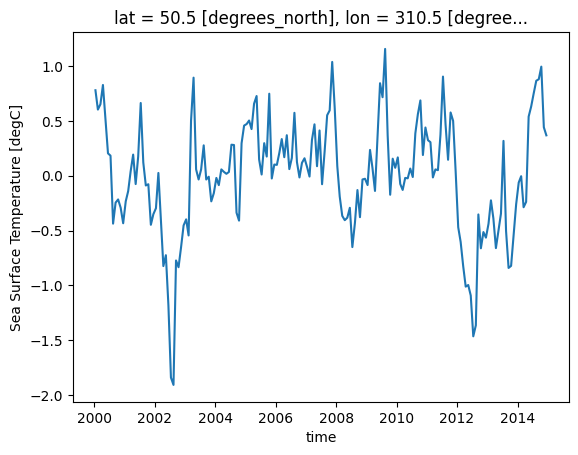

In [31]:
# Use the robust conversion fallback for the anomaly plot
import pandas as pd
tos_anom_plt = tos_anom.copy()
try:
    tos_anom_plt['time'] = tos_anom_plt.indexes['time'].to_datetimeindex()
except:
    tos_anom_plt['time'] = [pd.Timestamp(str(t)) for t in tos_anom_plt.time.values]

tos_anom_plt.sel(lon=310, lat=50, method='nearest').plot();

In this example, we compute and plot our dataset's mean global anomaly over time. In order to specify global data, we must provide both `lat` and `lon` to the `mean()` method's `dim` keyword argument:

/tmp/ipython-input-3988668459.py:6: FutureWarning: In a future version of xarray to_datetimeindex will default to returning a 'us'-resolution DatetimeIndex instead of a 'ns'-resolution DatetimeIndex. This warning can be silenced by explicitly passing the `time_unit` keyword argument.
  unweighted_mean_global_anom['time'] = unweighted_mean_global_anom.indexes['time'].to_datetimeindex()


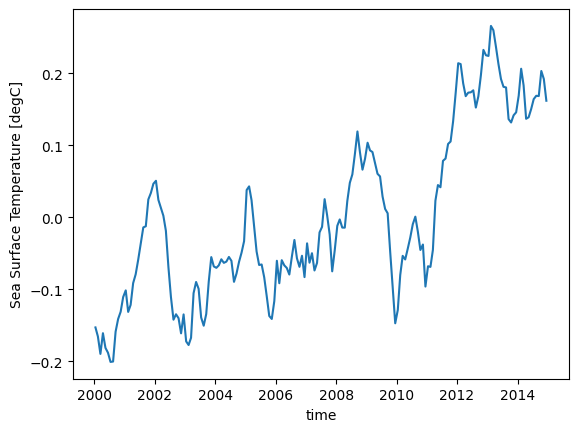

In [33]:
# Convert cftime to standard datetime for global anomaly plotting
unweighted_mean_global_anom = tos_anom.mean(dim=['lat', 'lon'])

try:
    # Attempt standard conversion
    unweighted_mean_global_anom['time'] = unweighted_mean_global_anom.indexes['time'].to_datetimeindex()
except:
    # Fallback for complex cftime indices
    import pandas as pd
    unweighted_mean_global_anom['time'] = [pd.Timestamp(str(t)) for t in unweighted_mean_global_anom.time.values]

unweighted_mean_global_anom.plot();

```{admonition} Info
:class: warning

Many geoscientific algorithms perform operations over data contained in many different grid cells. However, if the grid cells are not equivalent in size, the operation is not scientifically valid by default. Fortunately, this can be fixed by weighting the data in each grid cell by the size of the cell. Weighting data in Xarray is simple, as Xarray has a built-in weighting method, known as [`.weighted()`](https://xarray.pydata.org/en/stable/user-guide/computation.html#weighted-array-reductions).


In this example, we again make use of the Pythia example data library to load a new CESM2 dataset. Contained in this dataset are weights corresponding to the grid cells in our anomaly data:

In [34]:
filepath2 = DATASETS.fetch('CESM2_grid_variables.nc')
areacello = xr.open_dataset(filepath2).areacello
areacello

<xarray.DataArray 'areacello' (lat: 180, lon: 360)> Size: 518kB
[64800 values with dtype=float64]
Coordinates:
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Attributes: (12/17)
    cell_methods:   area: sum
    comment:        TAREA
    description:    Cell areas for any grid used to report ocean variables an...
    frequency:      fx
    id:             areacello
    long_name:      Grid-Cell Area for Ocean Variables
    ...             ...
    time_label:     None
    time_title:     No temporal dimensions ... fixed field
    title:          Grid-Cell Area for Ocean Variables
    type:           real
    units:          m2
    variable_id:    areacello

In a similar fashion to a previous example, this example calculates mean global anomaly. However, this example makes use of the `.weighted()` method and the newly loaded CESM2 dataset to weight the grid cell data as described above:

In [35]:
weighted_mean_global_anom = tos_anom.weighted(areacello).mean(dim=['lat', 'lon'])

This example plots both unweighted and weighted mean data, which illustrates the degree of scientific error with unweighted data:

/tmp/ipython-input-3982561201.py:7: FutureWarning: In a future version of xarray to_datetimeindex will default to returning a 'us'-resolution DatetimeIndex instead of a 'ns'-resolution DatetimeIndex. This warning can be silenced by explicitly passing the `time_unit` keyword argument.
  da_copy['time'] = da_copy.indexes['time'].to_datetimeindex()


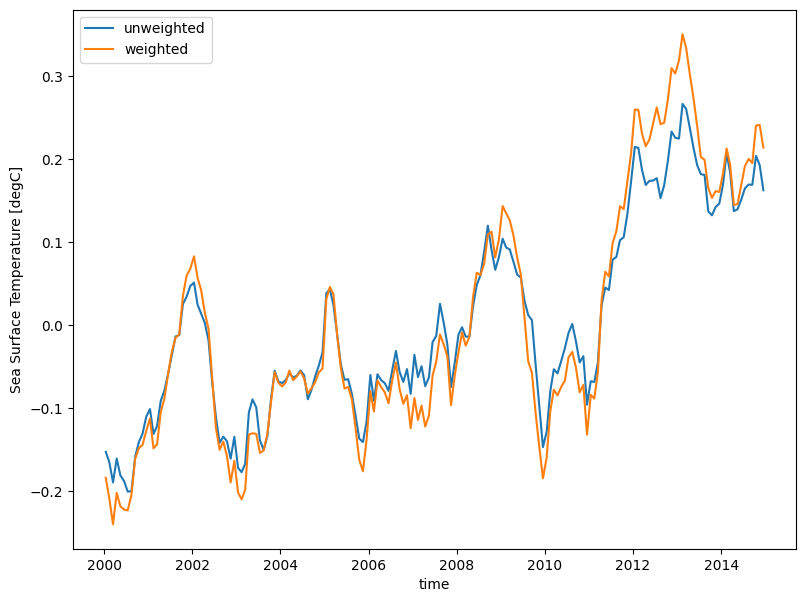

In [37]:
# Convert both to standard datetime for comparison plotting
import pandas as pd

def fix_time(da):
    da_copy = da.copy()
    try:
        da_copy['time'] = da_copy.indexes['time'].to_datetimeindex()
    except:
        da_copy['time'] = [pd.Timestamp(str(t)) for t in da_copy.time.values]
    return da_copy

unweighted_plt = fix_time(unweighted_mean_global_anom)
weighted_plt = fix_time(weighted_mean_global_anom)

unweighted_plt.plot(size=7)
weighted_plt.plot()
plt.legend(['unweighted', 'weighted']);

## Other high level computation functionality

- `resample`: [This method behaves similarly to groupby, but is specialized for time dimensions, and can perform temporal upsampling and downsampling.](https://xarray.pydata.org/en/stable/user-guide/time-series.html#resampling-and-grouped-operations)
- `rolling`: [This method is used to compute aggregation functions, such as `mean`, on moving windows of data in a dataset.](https://xarray.pydata.org/en/stable/user-guide/computation.html#rolling-window-operations)
- `coarsen`: [This method provides generic functionality for performing downsampling operations on various types of data.](https://xarray.pydata.org/en/stable/user-guide/computation.html#coarsen-large-arrays)

This example illustrates the resampling of a dataset's time dimension to annual frequency:

In [38]:
r = ds.tos.resample(time='AS')
r

<string>:7: FutureWarning: 'AS' is deprecated and will be removed in a future version. Please use 'YS' instead of 'AS'.


<DataArrayResample, grouped over 1 grouper(s), 15 groups in total:
    '__resample_dim__': TimeResampler('__resample_dim__'), 15/15 groups with labels 2000-01-01, 00:00:00, ..., 201...>

In [39]:
r.mean()

<xarray.DataArray 'tos' (time: 15, lat: 180, lon: 360)> Size: 4MB
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.7474419, -1.7474264, -1.7474008, ..., -1.7474308,
         -1.7474365, -1.7474445],
        [-1.7424874, -1.7424612, -1.7424251, ..., -1.742536 ,
         -1.7425283, -1.7425116],
        [-1.7382039, -1.7381679, -1.7381277, ..., -1.7383199,
         -1.7382846, -1.7382454]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [-1.6902231, -1.6899008, -1.6895409, ..., -1.6910189,
         -1.6907759, -1.6905178],
        [-1.6879102, -1.6876906, -1.6874666, ..., -1.6885366,
         -1.6883289, -1.688121 ],
        [-1.6883243, -1.6881752, -1.6880217, ..., -1.6886654,
         -1.6885542, -1.6884427]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.6893266, -1.6893964, -1.6894479, ..., -1.6889572,
         -1.6890831, -1.6892204],
        [-1.6776317, -1.6777302, -1.6778082, ..., -1.6771463,
         -1.6773272, -1.677492 ],
        [-1.672563 , -1.6726688, -1.6727766, ..., -1.6723493,
         -1.6724195, -1.6724887]]], dtype=float32)
Coordinates:
  * time     (time) object 120B 2000-01-01 00:00:00 ... 2014-01-01 00:00:00
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Attributes: (12/19)
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    This may differ from "surface temperature" in regions of ...
    frequency:      mon
    id:             tos
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Surface Temperature
    type:           real
    units:          degC
    variable_id:    tos

This example illustrates using the `rolling` method to compute averages in a moving window of 5 months of data:

In [40]:
m_avg = ds.tos.rolling(time=5, center=True).mean()
m_avg

<xarray.DataArray 'tos' (time: 180, lat: 180, lon: 360)> Size: 47MB
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
  * time     (time) object 1kB 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Attributes: (12/19)
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    This may differ from "surface temperature" in regions of ...
    frequency:      mon
    id:             tos
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Surface Temperature
    type:           real
    units:          degC
    variable_id:    tos

/tmp/ipython-input-3960374552.py:8: FutureWarning: In a future version of xarray to_datetimeindex will default to returning a 'us'-resolution DatetimeIndex instead of a 'ns'-resolution DatetimeIndex. This warning can be silenced by explicitly passing the `time_unit` keyword argument.
  da_copy['time'] = da_copy.indexes['time'].to_datetimeindex()


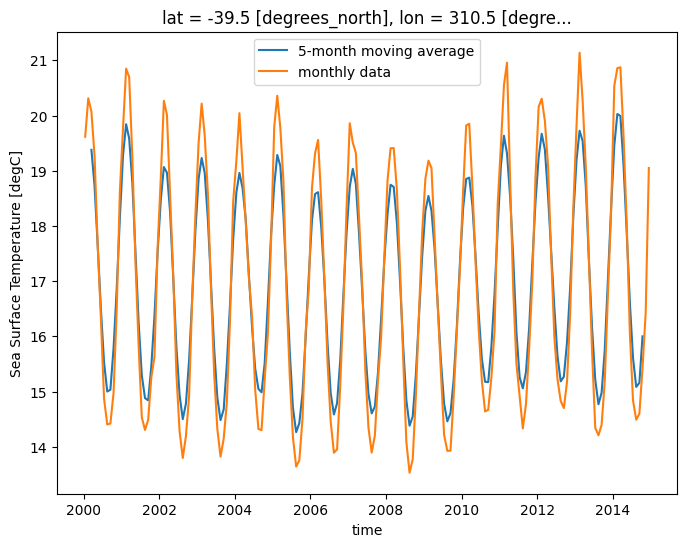

In [42]:
import pandas as pd
lat = 50
lon = 310

def fix_time(da):
    da_copy = da.copy()
    try:
        da_copy['time'] = da_copy.indexes['time'].to_datetimeindex()
    except:
        da_copy['time'] = [pd.Timestamp(str(t)) for t in da_copy.time.values]
    return da_copy

m_avg_plt = fix_time(m_avg.isel(lat=lat, lon=lon))
tos_plt = fix_time(ds.tos.isel(lat=lat, lon=lon))

m_avg_plt.plot(size=6)
tos_plt.plot()
plt.legend(['5-month moving average', 'monthly data']);

## Masking Data


Masking of data can be performed in Xarray by providing single or multiple conditions to either Xarray's `.where()` method or a `Dataset` or `DataArray`'s `.where()` method. Data values matching the condition(s) are converted into a single example value, effectively masking them from the scientifically important data. In the following set of examples, we use the `.where()` method to mask various data values in the `tos` `DataArray`.

For reference, we will first print our entire sea-surface temperature (SST) dataset:

In [43]:
ds

<xarray.Dataset> Size: 47MB
Dimensions:    (time: 180, d2: 2, lat: 180, lon: 360)
Coordinates:
  * time       (time) object 1kB 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Dimensions without coordinates: d2
Data variables:
    time_bnds  (time, d2) object 3kB ...
    lat_bnds   (lat, d2) float64 3kB ...
    lon_bnds   (lon, d2) float64 6kB ...
    tos        (time, lat, lon) float32 47MB nan nan nan ... -1.746 -1.746
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  219000.0
    case_id:                972
    ...                     ...
    sub_experiment_id:      none
    table_id:               Omon
    tracking_id:            hdl:21.14100/2975ffd3-1d7b-47e3-961a-33f212ea4eb2
    variable_id:            tos
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r11i1p1f1

### Using `where` with one condition

In this set of examples, we are trying to analyze data at the last temporal value in the dataset. This first example illustrates the use of `.isel()` to perform this analysis:

In [44]:
sample = ds.tos.isel(time=-1)
sample

<xarray.DataArray 'tos' (lat: 180, lon: 360)> Size: 259kB
array([[      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       ...,
       [-1.756119, -1.756165, -1.756205, ..., -1.755922, -1.755986, -1.756058],
       [-1.750638, -1.750658, -1.750667, ..., -1.750508, -1.750561, -1.750605],
       [-1.74627 , -1.746267, -1.746261, ..., -1.746309, -1.746299, -1.746285]],
      dtype=float32)
Coordinates:
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    time     object 8B 2014-12-15 12:00:00
Attributes: (12/19)
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    This may differ from "surface temperature" in regions of ...
    frequency:      mon
    id:             tos
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Surface Temperature
    type:           real
    units:          degC
    variable_id:    tos

As shown in the previous example, methods like `.isel()` and `.sel()` return data of a different shape than the original data provided to them. However, `.where()` preserves the shape of the original data by masking the values with a Boolean condition. Data values for which the condition is `True` are returned identical to the values passed in. On the other hand, data values for which the condition is `False` are returned as a preset example value. (This example value defaults to `nan`, but can be set to other values as well.)

Before testing `.where()`, it is helpful to look at the [official documentation](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.where.html). As stated above, the `.where()` method takes a Boolean condition. (Boolean conditions use operators such as less-than, greater-than, and equal-to, and return a value of `True` or `False`.) Most uses of `.where()` check whether or not specific data values are less than or greater than a constant value. As stated in the documentation, the data values specified in the Boolean condition of `.where()` can be any of the following:

- a `DataArray`
- a `Dataset`
- a function

In the following example, we make use of `.where()` to mask data with temperature values greater than `0`. Therefore, values greater than `0` are set to `nan`, as described above. (It is important to note that the Boolean condition matches values to keep, not values to mask out.)

In [45]:
masked_sample = sample.where(sample < 0.0)
masked_sample

<xarray.DataArray 'tos' (lat: 180, lon: 360)> Size: 259kB
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [-1.7561191, -1.7561648, -1.7562052, ..., -1.7559224, -1.7559862,
        -1.7560585],
       [-1.7506379, -1.7506577, -1.7506672, ..., -1.7505083, -1.750561 ,
        -1.7506049],
       [-1.7462697, -1.7462667, -1.7462606, ..., -1.7463093, -1.746299 ,
        -1.7462848]], dtype=float32)
Coordinates:
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    time     object 8B 2014-12-15 12:00:00
Attributes: (12/19)
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    This may differ from "surface temperature" in regions of ...
    frequency:      mon
    id:             tos
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Surface Temperature
    type:           real
    units:          degC
    variable_id:    tos

In this example, we use Matplotlib to plot the original, unmasked data, as well as the masked data created in the previous example.

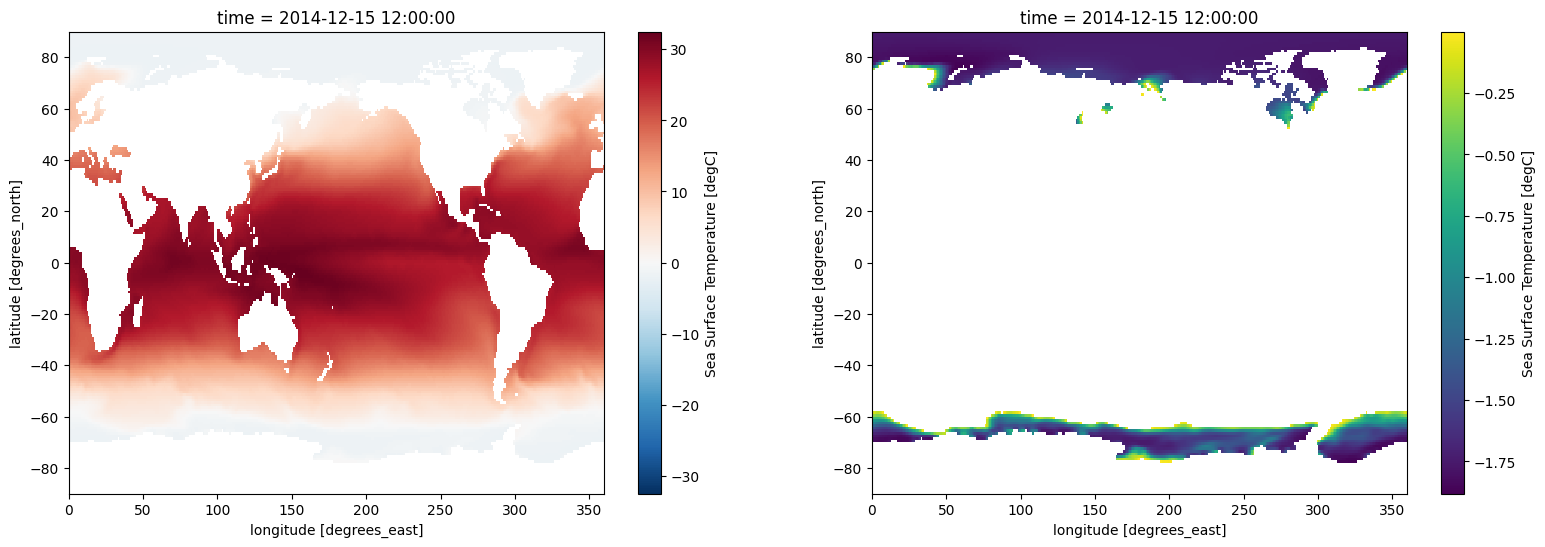

In [46]:
fig, axes = plt.subplots(ncols=2, figsize=(19, 6))
sample.plot(ax=axes[0])
masked_sample.plot(ax=axes[1]);

### Using `where` with multiple conditions

Those familiar with Boolean conditions know that such conditions can be combined by using logical operators. In the case of `.where()`, the relevant logical operators are bitwise or exclusive `'and'` (represented by the `&` symbol) and bitwise or exclusive 'or' (represented by the `|` symbol). This allows multiple masking conditions to be specified in a single use of `.where()`; however, be aware that if multiple conditions are specified in this way, each simple Boolean condition must be enclosed in parentheses. (If you are not familiar with Boolean conditions, or this section is confusing in any way, please review a detailed Boolean expression guide before continuing with the tutorial.) In this example, we provide multiple conditions to `.where()` using a more complex Boolean condition. This allows us to mask locations with temperature values less than 25, as well as locations with temperature values greater than 30. (As stated above, the Boolean condition matches values to keep, and everything else is masked out. Because we are now using more complex Boolean conditions, understanding the following example may be difficult. Please review a Boolean condition guide if needed.)

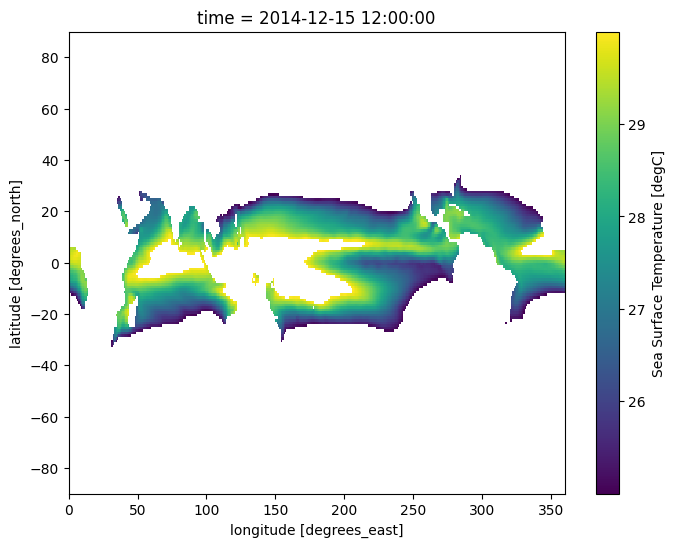

In [47]:
sample.where((sample > 25) & (sample < 30)).plot(size=6);

In addition to using `DataArrays` and `Datasets` in Boolean conditions provided to `.where()`, we can also use coordinate variables. In the following example, we make use of Boolean conditions containing `latitude` and `longitude` coordinates. This greatly simplifies the masking of regions outside of the [Niño 3.4 region](https://www.ncei.noaa.gov/access/monitoring/enso/sst/):

![](https://www.ncei.noaa.gov/monitoring-content/teleconnections/nino-regions.gif)

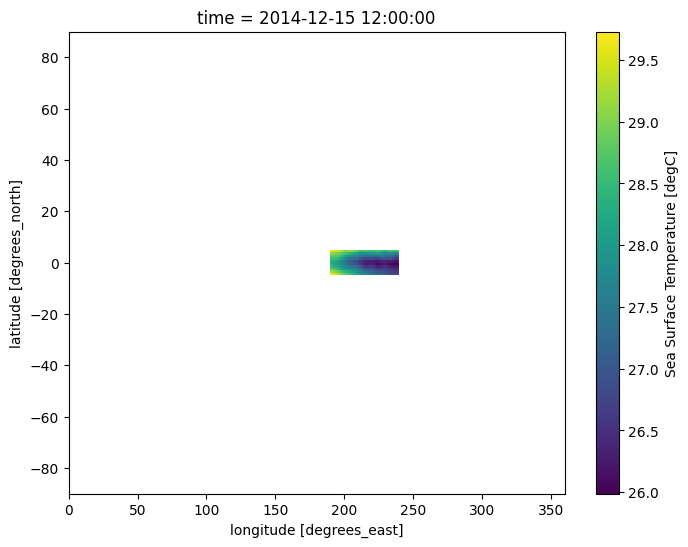

In [48]:
sample.where(
    (sample.lat < 5) & (sample.lat > -5) & (sample.lon > 190) & (sample.lon < 240)
).plot(size=6);

### Using `where` with a custom fill value

In the previous examples that make use of `.where()`, the masked data values are set to `nan`. However, this behavior can be modified by providing a second value, in numeric form, to `.where()`; if this numeric value is provided, it will be used instead of `nan` for masked data values. In this example, masked data values are set to `0` by providing a second value of `0` to the `.where()` method:

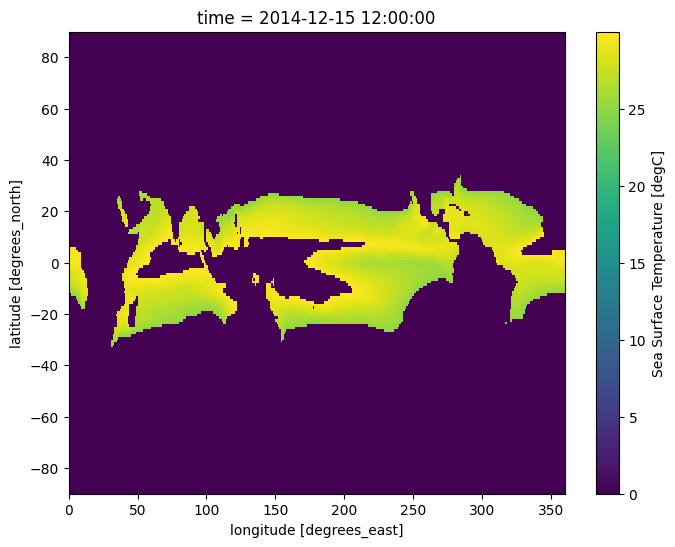

In [49]:
sample.where((sample > 25) & (sample < 30), 0).plot(size=6);

---

## Summary

- In a similar manner to NumPy arrays, performing arithmetic on a `DataArray` affects all values simultaneously.
- Xarray allows for simple data aggregation, over single or multiple dimensions, by way of built-in methods such as `sum()` and `mean()`.
- Xarray supports the useful split-apply-combine workflow through the `groupby` method.
- Xarray allows replacing (masking) of data matching specific Boolean conditions by means of the `.where()` method.

### What's next?

The next tutorial illustrates the use of previously covered Xarray concepts in a geoscientifically relevant example: plotting the [Niño 3.4 Index](https://climatedataguide.ucar.edu/climate-data/nino-sst-indices-nino-12-3-34-4-oni-and-tni).

## Additional Resources

- `groupby`: [Useful for binning/grouping data and applying reductions and/or transformations on those groups](https://xarray.pydata.org/en/stable/user-guide/groupby.html)
- `resample`: [Functionality similar to groupby, specialized for time dimensions. Can be used for temporal upsampling and downsampling](https://xarray.pydata.org/en/stable/user-guide/time-series.html#resampling-and-grouped-operations)
- `rolling`: [Useful for computing aggregations on moving windows of your dataset, e.g., computing moving averages](https://xarray.pydata.org/en/stable/user-guide/computation.html#rolling-window-operations)
- `coarsen`: [Generic functionality for downsampling data](https://xarray.pydata.org/en/stable/user-guide/computation.html#coarsen-large-arrays)

- `weighted`: [Useful for weighting data before applying reductions](https://xarray.pydata.org/en/stable/user-guide/computation.html#weighted-array-reductions)

- [More xarray tutorials and videos](https://docs.xarray.dev/en/stable/getting-started-guide/tutorials-and-videos.html)
- [Xarray Documentation - Masking with `where()`](https://xarray.pydata.org/en/stable/user-guide/indexing.html#masking-with-where)
